In [2]:
#Required modules for k means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [14]:
raw_data = pd.read_csv('Categorical.csv')
raw_data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [16]:
data = raw_data.copy()

In [18]:
data['continent'].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [20]:
data['continent'] = data['continent'].map({'North America' : 0, 'Asia' : 1, 'Africa' : 2, 'Europe' : 3, 'South America' : 4,
       'Oceania' : 5, 'Antarctica' : 6, 'Seven seas (open ocean)' : 7})
data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3


In [28]:
x = data.iloc[:, 1:4]
x

,Longitude,Latitude,continent
0,-69.982677,12.520880,0
1,66.004734,33.835231,1
2,17.537368,-12.293361,2
3,-63.064989,18.223959,0
4,20.049834,41.142450,3
...,...,...,...
236,-172.164851,-13.753243,5
237,47.586762,15.909280,1
238,25.083901,-29.000341,2
239,27.774759,-13.458242,2


(-120.0, 120.0)

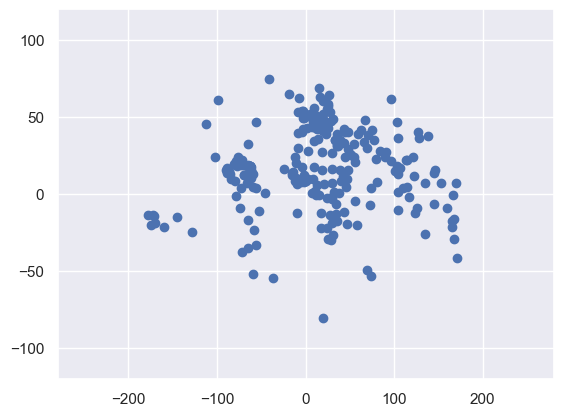

In [30]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-280,280)
plt.ylim(-120, 120)

In [32]:
kmeans = KMeans(8)
kmeans.fit(x)

C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans()

In [36]:
identified_clusters = kmeans.fit_predict(x)

C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
data['Cluster'] = identified_clusters

(-120.0, 120.0)

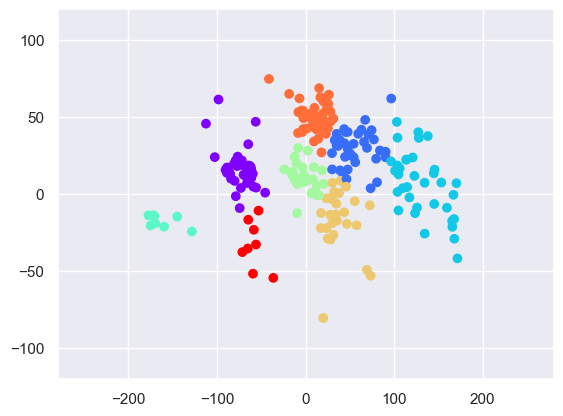

In [40]:
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='rainbow')
plt.xlim(-280,280)
plt.ylim(-120, 120)

# Elbow Method

## WCSS
## Within cluster sum of sqaures
## kmeans.inertia_

In [48]:
c1_sum = 11
wcss = []
for i in range(1, 11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

wcss

C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

[1414582.2109547595,
 657709.2003208959,
 325945.5853134786,
 260011.29875800223,
 196904.63717357404,
 154847.09502908622,
 128450.43925142361,
 103346.74182431077,
 85321.90573498332,
 76874.1948140121]

Text(0, 0.5, 'Within-cluster Sum of Squares')

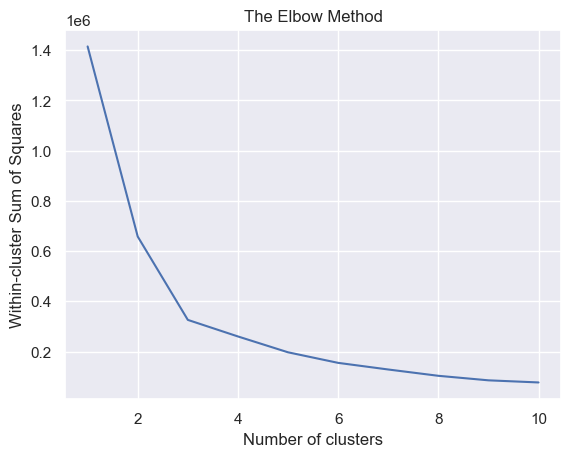

In [58]:
number_clusters = range(1,11)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [64]:
Selected_cluster = 3
kmeans = KMeans(3)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
data2 = data.copy()
data2.head()

data2['Cluster'] = identified_clusters
data2.head()

C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,2
1,Afghanistan,66.004734,33.835231,1,0
2,Angola,17.537368,-12.293361,2,0
3,Anguilla,-63.064989,18.223959,0,2
4,Albania,20.049834,41.142450,3,0


(-120.0, 120.0)

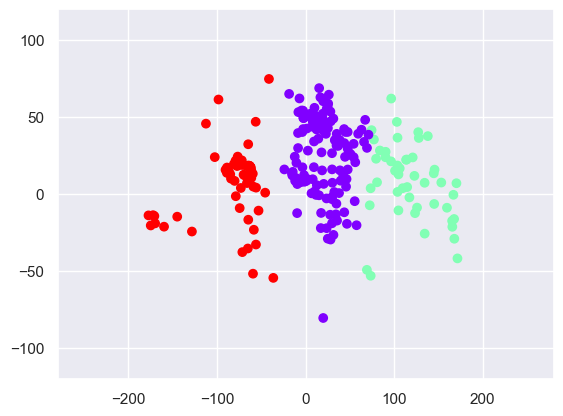

In [66]:
plt.scatter(data2['Longitude'], data2['Latitude'], cmap='rainbow', c=data2['Cluster'])
plt.xlim(-280,280)
plt.ylim(-120, 120)